## Going Deeeeeeep

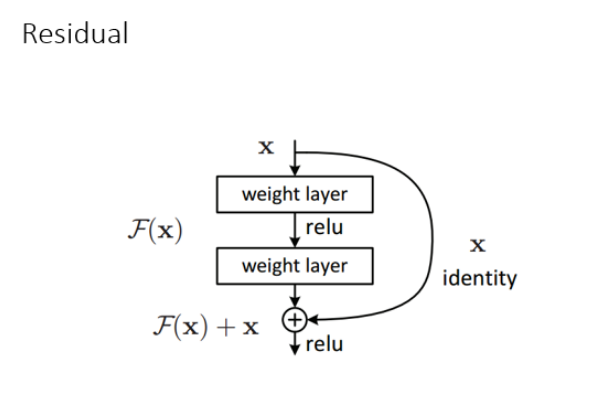

## 計算機視覺競賽(ILSVRC)
* ILSVR: ImageNet Large Scale Visual Recognition Competition
* 2015 冠軍 ResNet(Microsoft)
* ResNet 創造兩個重要的里程碑. 
  - 超越人類
  - deep
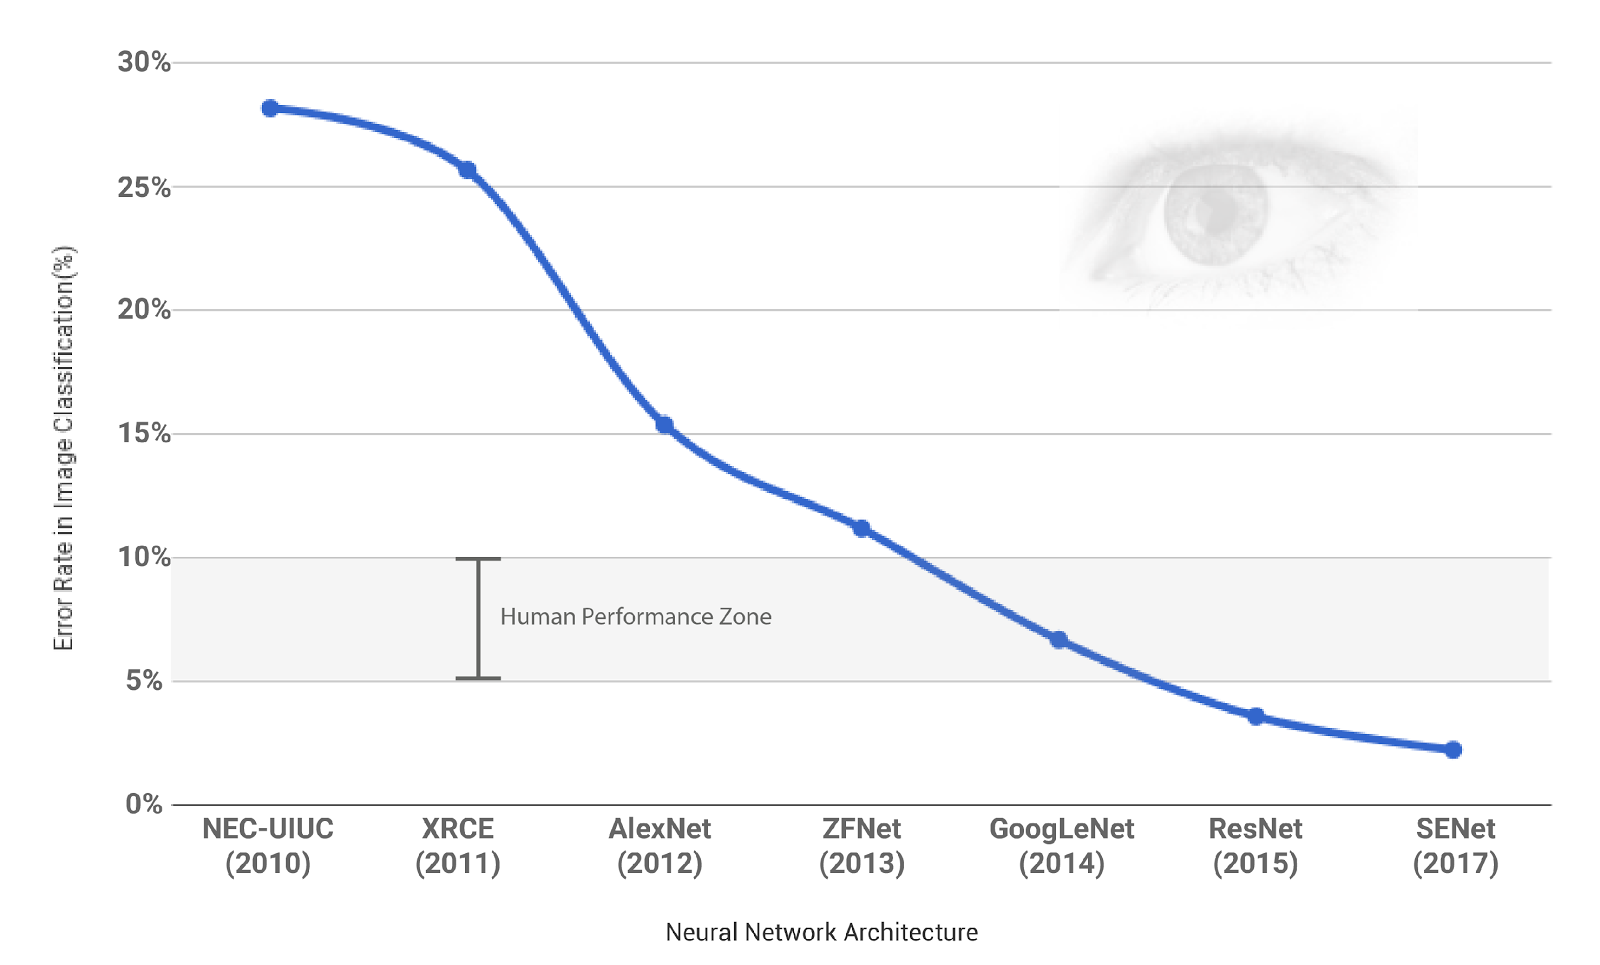

## ResNet50 進行 ImageNet 分類
* Keras example [cifar10_resnet.py](https://github.com/keras-team/keras/blob/master/examples/cifar10_resnet.py), 有興趣可以挑戰看看
* 以下 sample code 是採用已經建立好且訓練完成的 model 直接做預測

* import ResNet50 model
* download 訓練好的 "imagenet" weights file

In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

model = ResNet50(weights='imagenet')

/home/tony/dnn/anaconda2/envs/myjupyter/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


* 下載測試圖片

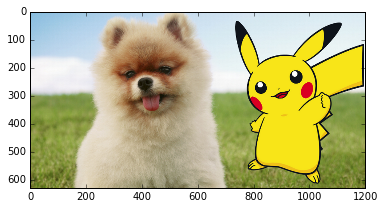

In [2]:
def download_img(url):
    file = urllib.urlretrieve(url, "test_img.jpg")
    return file[0]

url = "https://i2-prod.mirror.co.uk/incoming/article8553582.ece/ALTERNATES/s1200/pomdog-pikachu.png"
img_path = download_img(url)
img_org = mpimg.imread(img_path)
plt.imshow(img_org)

* Rescale to fit ResNet50 input shape (224 x 224)

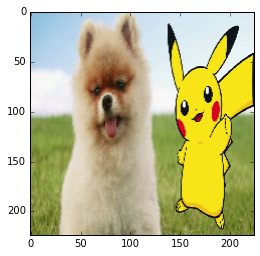

In [3]:
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

## 辨識結果
* No.1 博美 63.1%
* No.2 薩摩犬 26.6%
* No.3 愛斯基摩犬 2.1%

In [4]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

('Predicted:', [(u'n02112018', u'Pomeranian', 0.6317532), (u'n02111889', u'Samoyed', 0.26665017), (u'n02109961', u'Eskimo_dog', 0.021411307)])
